<a href="https://colab.research.google.com/github/BBMRI-ERIC/ISO23494-PROV-demonstrator/blob/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/fullProvChainBiobanking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# INSTALL PACKAGES
#
!pip install prov
!pip install rdflib

document
  default <https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/biobank_2020-11-21_5784167>
  prefix cpim <http://cpim.org/>
  prefix cpm <http://part2-common-provenance-model.ISO-23494.org/>
  prefix pbm <http://part3-provenance-of-biological-material.ISO-23494.org/>
  prefix obo <http://purl.obolibrary.org/obo/>
  prefix sphn <https://biomedit.ch/rdf/sphn-ontology/sphn#>
  prefix snomed <http://snomed.info/id/>
  prefix loinc <https://biomedit.ch/rdf/sphn-resource/loinc/>
  prefix geosparql <http://www.opengis.net/ont/geosparql#>
  prefix biobank <http://demo-biobank.org/>
  prefix hospital <http://demo-hospital.org/>
  
  bundle biobank:ExampleBiobank
    prefix hospital <http://demo-hospital.org/>
    
    agent(biobank:WORKER_7275457, [prov:type="prov:Person", name="Anna Aligator"])
    agent(biobank:WORKER_7275987, [prov:ty

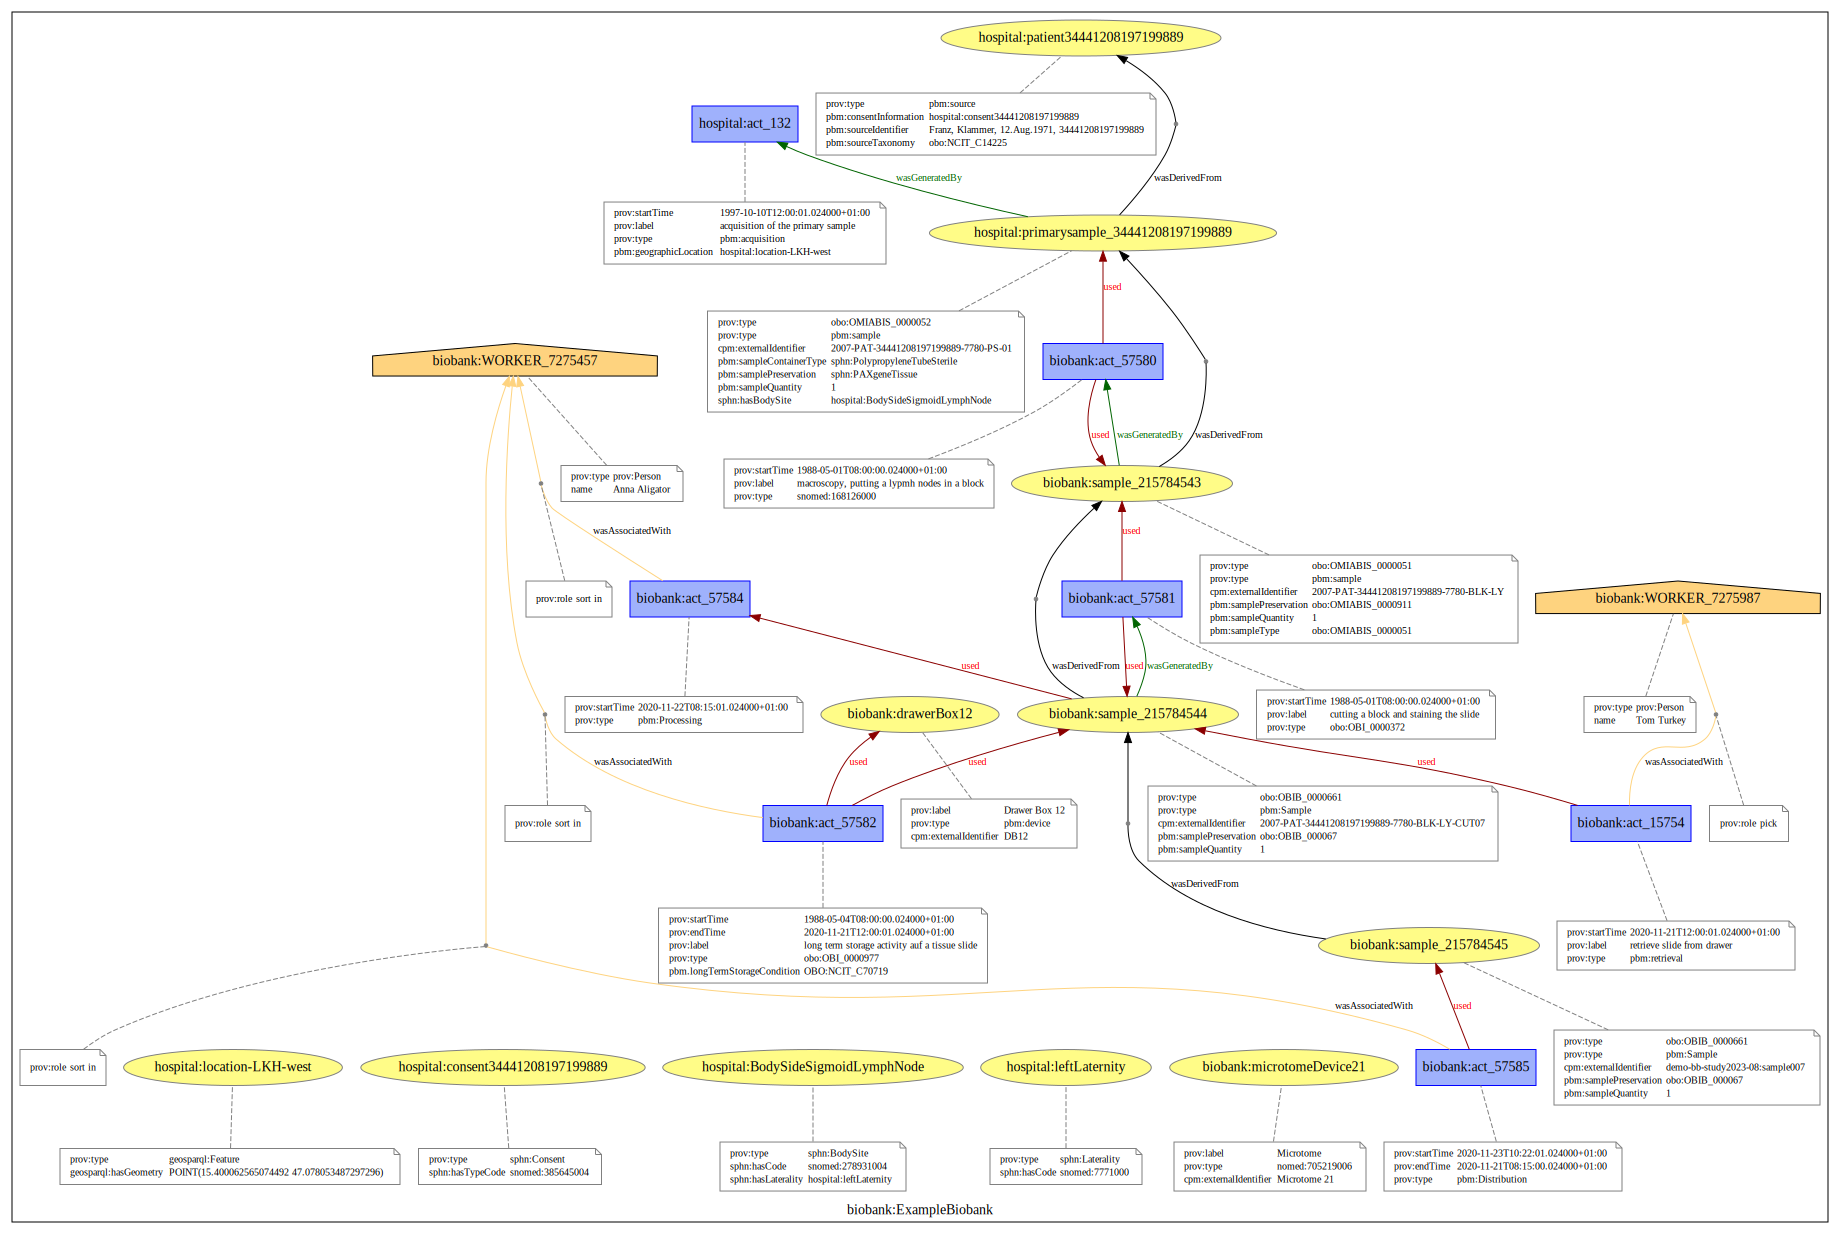

In [3]:
import prov.model as prov
import json
import io


from prov.dot import prov_to_dot
from IPython.display import SVG

from rdflib import Graph

document = prov.ProvDocument()

document.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/Biobank')
document.add_namespace('cpim',  'http://cpim.org/')
document.add_namespace('cpm',   'http://part2-common-provenance-model.ISO-23494.org/')
document.add_namespace('pbm',   'http://part3-provenance-of-biological-material.ISO-23494.org/')
document.add_namespace('obo',   'http://purl.obolibrary.org/obo/')
document.add_namespace('sphn',  'https://biomedit.ch/rdf/sphn-ontology/sphn#')
document.add_namespace('snomed','http://snomed.info/id/')
document.add_namespace('loinc', 'https://biomedit.ch/rdf/sphn-resource/loinc/')
document.add_namespace('geosparql', 'http://www.opengis.net/ont/geosparql#')
document.add_namespace('biobank',   'http://demo-biobank.org/')
document.add_namespace('hospital',  'http://demo-hospital.org/')

######################Biobank_delivery20201121_5784167######################
bbb = document.bundle('biobank:ExampleBiobank')
document.set_default_namespace('https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/https://github.com/BBMRI-ERIC/ISO23494-PROV-demonstrator/tree/main/Part%203%20-%20Provenance%20of%20Biological%20Specimen/examples-2023/biobank_2020-11-21_5784167')

###################### actors in the biobank ######################
bbb.agent('biobank:WORKER_7275457', {prov.PROV_TYPE: 'prov:Person', 'name': "Anna Aligator"})
bbb.agent('biobank:WORKER_7275987', {prov.PROV_TYPE: 'prov:Person', 'name': "Tom Turkey"})

################### sample, delivered to researcher ######################
sample_215784545 = bbb.entity('biobank:sample_215784545', (
    (prov.PROV_TYPE, "pbm:Sample"),
     (prov.PROV_TYPE, 'obo:OBIB_0000661'), #H&E-stained fixed tissue slide specimen
    ('cpm:externalIdentifier', "demo-bb-study2023-08:sample007"),
    ('pbm:samplePreservation', 'obo:OBIB_000067'),
    ('pbm:sampleQuantity', "1")
    ))

bbb.activity('biobank:act_57585', '2020-11-23T10:22:01.024000+01:00','2020-11-21T08:15:00.024000+01:00', {prov.PROV_TYPE: "pbm:Distribution"})
bbb.wasAssociatedWith('biobank:act_57585', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
bbb.used('biobank:act_57585', 'biobank:sample_215784545')

################### Same sample with the barcode used in the Biobank  ######################
sample_215784544 = bbb.entity('biobank:sample_215784544', (
    (prov.PROV_TYPE, "pbm:Sample"),
    (prov.PROV_TYPE, 'obo:OBIB_0000661'), #H&E-stained fixed tissue slide specimen
    ('cpm:externalIdentifier', "2007-PAT-34441208197199889-7780-BLK-LY-CUT07"),
    ('pbm:samplePreservation', 'obo:OBIB_000067'),
    ('pbm:sampleQuantity', "1")
    ))

bbb.wasDerivedFrom('biobank:sample_215784545' ,'biobank:sample_215784544')

#Relabeling
bbb.activity('biobank:act_57584', '2020-11-22T08:15:01.024000+01:00', None, {prov.PROV_TYPE: "pbm:Processing"})
bbb.wasAssociatedWith('biobank:act_57584', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
bbb.used('biobank:sample_215784544','biobank:act_57584' )

#Retrieval from Biobank

bbb.activity('biobank:act_15754', '2020-11-21T12:00:01.024000+01:00',None,
                                { prov.PROV_TYPE: "pbm:retrieval",
                                  'prov:label':"retrieve slide from drawer"
                                }
                                )


bbb.wasAssociatedWith('biobank:act_15754', 'biobank:WORKER_7275987',None,None, {prov.PROV_ROLE: "pick"})
bbb.used('biobank:act_15754','biobank:sample_215784544',)

#Storing in Biobank
bbb.entity('biobank:drawerBox12', (
      (prov.PROV_TYPE, 'pbm:device'),
       ('prov:label',"Drawer Box 12"),
       ('cpm:externalIdentifier', "DB12")
       ))


bbb.activity('biobank:act_57582', '1988-05-04T08:00:00.024000+01:00','2020-11-21T12:00:01.024000+01:00',
                                { prov.PROV_TYPE: 'pbm:storage',
                                  prov.PROV_TYPE: 'obo:OBI_0000977', # Paraffin Storage
                                  'prov:label':"long term storage activity auf a tissue slide",
                                  'pbm.longTermStorageCondition': 'OBO:NCIT_C70719' # Specimen at Room Temperature
                                }
                                )

bbb.wasAssociatedWith('biobank:act_57582', 'biobank:WORKER_7275457',None,None, {prov.PROV_ROLE: "sort in"})
bbb.used('biobank:act_57582', 'biobank:sample_215784544' )
bbb.used('biobank:act_57582','biobank:drawerBox12')

# cutting and staining to a slide
bbb.used('biobank:act_57581', 'biobank:sample_215784543' )
bbb.used('biobank:act_57581', 'biobank:sample_215784544' )
bbb.wasGeneratedBy('biobank:sample_215784544', 'biobank:act_57581')
bbb.wasDerivedFrom('biobank:sample_215784544' ,'biobank:sample_215784543')

bbb.activity('biobank:act_57581', '1988-05-01T08:00:00.024000+01:00',None,
                                { prov.PROV_TYPE: 'pbm:processing',
                                  prov.PROV_TYPE: 'snomed:108256005',  #  Hematology Staining (procedure),
                                  prov.PROV_TYPE: 'obo:OBI_0000372',   #  material separation function; no better ontology found
                                  'prov:label':"cutting a block and staining the slide"
                                }
                                )
bbb.entity('biobank:microtomeDevice21', (
      (prov.PROV_TYPE, "nomed:705219006"),
       ('prov:label',"Microtome"),
       ('cpm:externalIdentifier', "Microtome 21")
       ))



# macroscopy, making a block
sample_215784543 = bbb.entity('biobank:sample_215784543', (
    (prov.PROV_TYPE, 'pbm:sample'),
    (prov.PROV_TYPE, 'obo:OMIABIS_0000051'),
    ('cpm:externalIdentifier', "2007-PAT-34441208197199889-7780-BLK-LY"),
    ('pbm:sampleType', 'obo:OMIABIS_0000051'),
    ('pbm:samplePreservation', 'obo:OMIABIS_0000911'),
    ('pbm:sampleQuantity', "1")
    ))


bbb.wasDerivedFrom('biobank:sample_215784543' ,'hospital:primarysample_34441208197199889')
bbb.wasGeneratedBy('biobank:sample_215784543', 'biobank:act_57580')

bbb.activity('biobank:act_57580', '1988-05-01T08:00:00.024000+01:00',None,
                                { prov.PROV_TYPE: 'pbm:processing',
                                  prov.PROV_TYPE: 'snomed:168126000', #  Sample macroscopy (procedure)
                                  'prov:label':'macroscopy, putting a lypmh nodes in a block'
                                }
                                )
bbb.used('biobank:act_57580', 'biobank:sample_215784543' )
bbb.used('biobank:act_57580', 'hospital:primarysample_34441208197199889' )

# can we model facts in PROV like in RDF, the following modelling is done similar
# https://sphn-semantic-framework.readthedocs.io/en/latest/user_guide/data_generation.html

#RPH, start

leftLaterality = bbb.entity('hospital:leftLaternity', (
    (prov.PROV_TYPE, 'sphn:Laterality'),
    ('sphn:hasCode', 'snomed:7771000')
    ))

bodySide = bbb.entity('hospital:BodySideSigmoidLymphNode', (
    (prov.PROV_TYPE, 'sphn:BodySite'),
    ('sphn:hasCode', 'snomed:278931004') # Entire sigmoid lymph node (body structure)
    ))

bodySide.add_attributes ({'sphn:hasLaterality': leftLaterality})

primarySample = bbb.entity('hospital:primarysample_34441208197199889', (
     (prov.PROV_TYPE, 'pbm:sample'),
     (prov.PROV_TYPE, 'obo:OMIABIS_0000052'),   #RPH like this or dedicted attribute for a sample type
    ('cpm:externalIdentifier', "2007-PAT-34441208197199889-7780-PS-01"),
    ('pbm:samplePreservation',  'sphn:PAXgeneTissue'),
    ('pbm:sampleContainerType', 'sphn:PolypropyleneTubeSterile'),
    ('pbm:sampleQuantity', "1")
    ))

primarySample.add_attributes ({'sphn:hasBodySite': bodySide})

#RPH, end


bbb.entity('hospital:patient34441208197199889', (
    (prov.PROV_TYPE, 'pbm:source'),
    ('pbm:sourceTaxonomy', 'obo:NCIT_C14225'),
    ('pbm:sourceIdentifier', "Franz, Klammer, 12.Aug.1971, 34441208197199889"),
    ('pbm:consentInformation',  'hospital:consent34441208197199889')
    ))

bbb.entity('hospital:consent34441208197199889', (
    (prov.PROV_TYPE, 'sphn:Consent'),
    ('sphn:hasTypeCode', 'snomed:385645004') #accepted
    ))

bbb.entity('hospital:location-LKH-west', (
    ('prov:type', 'geosparql:Feature'),
    ('geosparql:hasGeometry', "POINT(15.400062565074492 47.078053487297296)")  # Geospatial data as string literal
))

bbb.activity('hospital:act_132', '1997-10-10T12:00:01.024000+01:00',None,
                                { prov.PROV_TYPE: "pbm:acquisition",
                                  'prov:label':"acquisition of the primary sample",
                                  'pbm:geographicLocation':'hospital:location-LKH-west'
                                }
                                )

bbb.wasGeneratedBy('hospital:primarysample_34441208197199889', 'hospital:act_132')
bbb.wasDerivedFrom('hospital:primarysample_34441208197199889' ,'hospital:patient34441208197199889')

document.get_provn() # =>

provn = document.serialize(format='provn')
print(provn)



dotrep =   prov_to_dot(document)
svg_content = dotrep.create(format="svg", encoding="utf-8")
SVG(svg_content)
